#### Lab7-1 training/test dataset, learning rate, normalization

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np


x_data=[[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data=[[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

#Evaluation our model using this test dataset
x_test=[[2,1,1],[3,1,2],[3,3,4]]
y_test=[[0,0,1],[0,0,1],[0,0,1]] 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X=tf.placeholder("float",[None,3])
Y=tf.placeholder("float",[None,3])
W=tf.Variable(tf.random_normal([3,3]))
b=tf.Variable(tf.random_normal([3]))

hypothesis=tf.nn.softmax(tf.matmul(X,W)+b)
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction=tf.arg_max(hypothesis,1)
is_correct=tf.equal(prediction,tf.arg_max(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val,W_val,_=sess.run([cost,W,optimizer],
                              feed_dict={X:x_data,Y:y_data})
    print(step,cost_val,W_val)
  print("Prediction:",sess.run(prediction,feed_dict={X:x_test}))
  print("Accuracy: ",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))

0 3.3860536 [[-1.5580471e-03 -1.1540214e+00  1.7792566e-01]
 [ 2.5557801e-01 -7.4117076e-01 -8.8321462e-02]
 [-1.9791796e+00  4.7191551e-01 -6.2189406e-01]]
1 2.5277798 [[ 0.01967414 -1.1613996   0.16407168]
 [ 0.40902135 -0.7693564  -0.21357918]
 [-1.8220154   0.42402333 -0.7311661 ]]
2 1.8169076 [[ 0.03471818 -1.1799904   0.16761845]
 [ 0.5404217  -0.859357   -0.254979  ]
 [-1.6801332   0.31543148 -0.7644565 ]]
3 1.3417166 [[ 0.03569625 -1.1842836   0.17093357]
 [ 0.59976053 -0.8720266  -0.3016482 ]
 [-1.5954998   0.28028998 -0.81394845]]
4 1.2460026 [[ 0.02324401 -1.1852113   0.18431348]
 [ 0.5875582  -0.86416054 -0.29731196]
 [-1.5738904   0.2637912  -0.81905895]]
5 1.2298652 [[ 0.01058544 -1.1850615   0.19682226]
 [ 0.57327205 -0.850804   -0.29638237]
 [-1.554816    0.25327936 -0.8276216 ]]
6 1.2143524 [[-0.0017283  -1.1851948   0.20926943]
 [ 0.5601803  -0.8391626  -0.29493198]
 [-1.535004    0.24123468 -0.83538896]]
7 1.1992534 [[-0.01393869 -1.185223    0.2215079 ]
 [ 0.5469203

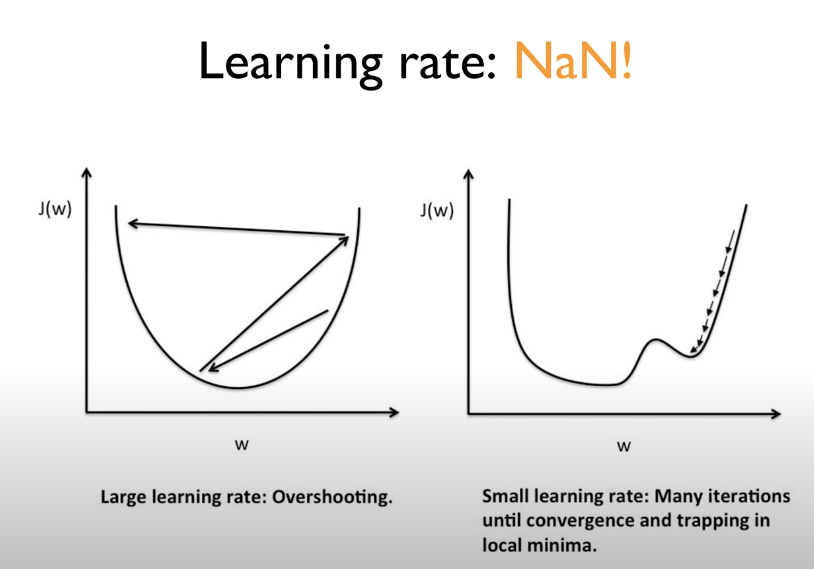

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
xy=np.array([[828.659973,833.450012,908100,828.349976,831.659973],
     [823.02002,828.070007,1828100,821.655029,828.070007],
     [819.929993,824.400024,1438100,818.97998,824.159973],
     [816,820.958984,1008100,815.48999,819.23999],
     [819.359985,823,1188100,818.469971,818.97998],
     [819,823,1198100,816,820.450012],
     [811.700012,815.25,1098100,809.780029,813.669983],
     [809.51001,816.659973,1398100,804.539978,809.559998]])
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

X=tf.placeholder(tf.float32,shape=[None,4])
Y=tf.placeholder(tf.float32,shape=[None,1])
W=tf.Variable(tf.random_normal([4,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.matmul(X,W)+b
cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val,hy_val,_=sess.run(
      [cost,hypothesis,train],feed_dict={X:x_data,Y:y_data})
  print(step,"Cost: ",cost_val,"\nPrediction:\n",hy_val)

  #non normalized inputs으로 인해 array에 nan값이 들어가 있다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1501 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1502 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1503 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1504 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1505 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1506 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1507 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1508 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1509 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1510 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1511 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1512 Co

In [17]:
#min-max scale을 사용해서 해결한다.
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

def min_max_scaler(data):
  numerator=data-np.min(data,0)
  denominator=np.max(data,0)-np.min(data,0)

  return numerator/(denominator+1e-7)

xy=np.array([[828.659973,833.450012,908100,828.349976,831.659973],
     [823.02002,828.070007,1828100,821.655029,828.070007],
     [819.929993,824.400024,1438100,818.97998,824.159973],
     [816,820.958984,1008100,815.48999,819.23999],
     [819.359985,823,1188100,818.469971,818.97998],
     [819,823,1198100,816,820.450012],
     [811.700012,815.25,1098100,809.780029,813.669983],
     [809.51001,816.659973,1398100,804.539978,809.559998]])

xy=min_max_scaler(xy)
print(xy)


[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [16]:
# normalized input
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

def min_max_scaler(data):
  numerator=data-np.min(data,0)
  denominator=np.max(data,0)-np.min(data,0)

  return numerator/(denominator+1e-7)

xy=np.array([[828.659973,833.450012,908100,828.349976,831.659973],
     [823.02002,828.070007,1828100,821.655029,828.070007],
     [819.929993,824.400024,1438100,818.97998,824.159973],
     [816,820.958984,1008100,815.48999,819.23999],
     [819.359985,823,1188100,818.469971,818.97998],
     [819,823,1198100,816,820.450012],
     [811.700012,815.25,1098100,809.780029,813.669983],
     [809.51001,816.659973,1398100,804.539978,809.559998]])

xy=min_max_scaler(xy)

x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

X=tf.placeholder(tf.float32,shape=[None,4])
Y=tf.placeholder(tf.float32,shape=[None,1])
W=tf.Variable(tf.random_normal([4,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.matmul(X,W)+b
cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val,hy_val,_=sess.run([cost,hypothesis,train],feed_dict={X:x_data,Y:y_data})
  print(step,"Cost: ",cost_val,"\nPrediction:\n",hy_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1501 Cost:  3.2632167 
Prediction:
 [[1.4314871]
 [2.4314487]
 [2.322633 ]
 [2.1891794]
 [2.1828277]
 [2.0979726]
 [2.482545 ]
 [2.5717094]]
1502 Cost:  3.2630315 
Prediction:
 [[1.4314147]
 [2.4313734]
 [2.3225698]
 [2.1891296]
 [2.1827698]
 [2.0979164]
 [2.4825034]
 [2.571667 ]]
1503 Cost:  3.2628465 
Prediction:
 [[1.4313426]
 [2.431298 ]
 [2.3225064]
 [2.1890795]
 [2.1827118]
 [2.0978599]
 [2.482462 ]
 [2.5716245]]
1504 Cost:  3.262661 
Prediction:
 [[1.4312702]
 [2.4312227]
 [2.322443 ]
 [2.1890295]
 [2.182654 ]
 [2.0978034]
 [2.4824204]
 [2.571582 ]]
1505 Cost:  3.262476 
Prediction:
 [[1.4311981]
 [2.4311476]
 [2.3223796]
 [2.1889796]
 [2.1825957]
 [2.097747 ]
 [2.4823787]
 [2.5715396]]
1506 Cost:  3.2622905 
Prediction:
 [[1.4311258]
 [2.4310722]
 [2.3223162]
 [2.1889296]
 [2.1825378]
 [2.0976906]
 [2.4823372]
 [2.5714972]]
1507 Cost:  3.2621055 
Prediction:
 [[1.4310536]
 [2.4309971]
 [2.322253 ]
 [2.1888795]
 [2.1824799]
 [2.097634 ]
 [2.48